In [71]:
#libraries
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import math

In [72]:
# Game of Life with stochastic elements added

N = 300
n_iter = 2000

x_step = np.array([random.choice([0,1,2]), random.choice([0,1,2])])
                   
y_step = np.array([random.choice([0,1,2]), random.choice([0,1,2])])

helped = []
harmed = []
blocked = []

In [73]:
#include Game of Life visual

In [74]:
(x_step, y_step)

(array([1, 2]), array([1, 1]))

In [75]:
#add code for acting upon by reinforcement learning

class Target():
    def __init__(self, pace = .1, capability = .1, propensity = 0.01, index = None):
        self.pace = random.triangular(.1,.5)
        self.capability = random.triangular(0.1, 1.0, 0.1)
        self.propensity = random.triangular(-0.1, 1.0, 0.1)
        
    def walking(self, x_step, y_step):
        if self.pace < 3:
            x_step = random.triangular(-1, 0.1, -0.6)
            y_step = random.triangular(-1, 0.1, -0.6)
        elif self.pace == 3:
            x_step = random.triangular(-0.1, 0.04, 0.2)
            y_step = random.triangular(-0.1, 0.04, 0.2)
        else:
            x_step = random.triangular(0.4, 0.1, 0.6)
            y_step = random.triangular(0.4, 0.1, 0.6)
        return (x_step, y_step)

In [76]:
class Helper(Target):
    def __init__(self): 
        Target.__init__(Target, pace = random.triangular(.1,.5), capability = 0, propensity = 0)
        self.pace = random.triangular(.6,1)
        self.capability = random.triangular(0,.5)
        self.propensity = random.triangular(-0.1, 1.0, 0.45)
        
    def helping(self, x_step, y_step):
        helped.append(Target().walking(x_step + 
                                       ((self.propensity) + 
                                        (self.pace)), 
                                       y_step + ((self.propensity) + (self.pace))))

class Hinderer(Target):
    def __init__(self): 
        Target.__init__(Target, pace = random.triangular(.1,.5), capability = 0, propensity = 0)
        self.pace = random.triangular(.1,.5)
        self.capability = random.triangular(0,.5)
        self.propensity = random.triangular(-1.0, 0.1, -0.45)
        
    def hindering(self, x_step, y_step):
        harmed.append(Target().walking(x_step - 
                                       ((self.propensity) + 
                                        (self.pace)), y_step - ((self.propensity) + (self.pace))))

class Obstacle():
    def __init__(self, strength = 0.1):
        self.strength = random.triangular(-0.9, -0.1, -0.3)

    def blocking(self, x_step, y_step):
        blocked.append(Target().walking(x_step - 
                                       self.strength, y_step - self.strength))

In [77]:
for n in range(0, n_iter):
    Helper().helping(x_step, y_step)
    Hinderer().hindering(x_step, y_step)
    Obstacle().blocking(x_step, y_step)

In [78]:
len(blocked)

2000

In [79]:
help_cossim = []
######
  
#cossims of highway to measure the similarity of each path, each goal among varied beings
for i,j in enumerate(helped):
    help_cossim.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))
    blocked.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))

/var/folders/yr/874s9zz951xblfgr49l65dlh0000gn/T/ipykernel_15382/201791781.py:6: RuntimeWarning: invalid value encountered in divide
  help_cossim.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))
/var/folders/yr/874s9zz951xblfgr49l65dlh0000gn/T/ipykernel_15382/201791781.py:7: RuntimeWarning: invalid value encountered in divide
  blocked.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))


In [80]:
help_cossim

[array([nan, nan]),
 array([-0.40758718, -0.9131663 ]),
 array([-0.81405707, -0.58078489]),
 array([-0.09697927, -0.9952864 ]),
 array([-0.56785266, -0.82313022]),
 array([-0.73854032, -0.67420931]),
 array([-0.93051323, -0.36625828]),
 array([-0.9573407 , -0.28896155]),
 array([-0.6843975 , -0.72910909]),
 array([-0.72002745, -0.69394558]),
 array([-0.87948892, -0.47591936]),
 array([-0.73825435, -0.67452244]),
 array([-0.46382814, -0.8859252 ]),
 array([-0.99712638, -0.07575605]),
 array([-0.40405868, -0.91473307]),
 array([-0.52131813, -0.85336241]),
 array([-0.86470156, -0.50228599]),
 array([-0.57112131, -0.82086567]),
 array([-0.54834317, -0.83625341]),
 array([-0.7009011 , -0.71325847]),
 array([-0.98338816,  0.18151506]),
 array([-0.6619737 , -0.74952706]),
 array([-0.85974451, -0.51072436]),
 array([-0.4393555 , -0.89831328]),
 array([-0.76210303, -0.64745577]),
 array([-0.37140661, -0.92847032]),
 array([-0.54654944, -0.83742684]),
 array([-0.35777608, -0.93380741]),
 array([

In [81]:
harm_cossim = []
#cossims of highway to measure the similarity of each path, each goal among varied beings
for i,j in enumerate(harmed):
    harm_cossim.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))
    blocked.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))
    
harm_cossim

/var/folders/yr/874s9zz951xblfgr49l65dlh0000gn/T/ipykernel_15382/74742015.py:4: RuntimeWarning: invalid value encountered in divide
  harm_cossim.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))
/var/folders/yr/874s9zz951xblfgr49l65dlh0000gn/T/ipykernel_15382/74742015.py:5: RuntimeWarning: invalid value encountered in divide
  blocked.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))


[array([nan, nan]),
 array([-0.95794445, -0.28695369]),
 array([-0.35460831, -0.93501494]),
 array([-0.63098636, -0.77579393]),
 array([-0.98776133, -0.15597294]),
 array([-0.89219632, -0.4516478 ]),
 array([-0.92032556, -0.39115325]),
 array([-0.69779497, -0.71629755]),
 array([-0.66889178, -0.74335979]),
 array([-0.75740674, -0.65294336]),
 array([-0.82863672, -0.55978673]),
 array([-0.44335999, -0.89634364]),
 array([-0.49187392, -0.87066644]),
 array([-0.93967186, -0.34207719]),
 array([-0.76388327, -0.64535444]),
 array([-0.54172496, -0.84055581]),
 array([-0.72766416, -0.68593358]),
 array([-0.75370128, -0.65721715]),
 array([-0.62705417, -0.77897565]),
 array([-0.4935901 , -0.86969466]),
 array([-0.55241879, -0.83356672]),
 array([-0.83921627, -0.54379781]),
 array([-0.45170225, -0.89216875]),
 array([-0.74783647, -0.66388299]),
 array([-0.57946058, -0.81500026]),
 array([-0.48412609, -0.87499825]),
 array([-0.80975129, -0.58677325]),
 array([-0.81152739, -0.58431438]),
 array([

<Axes: xlabel='x_step', ylabel='y_step'>

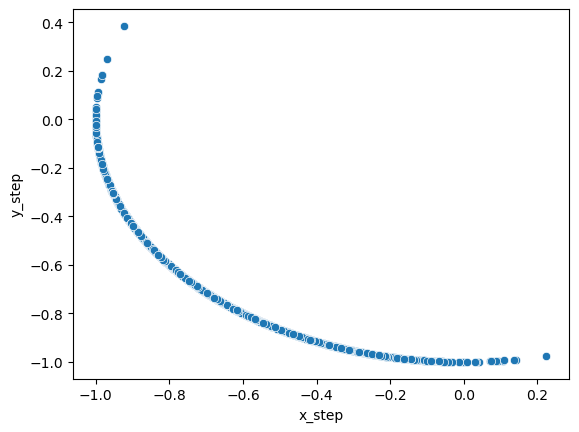

In [82]:
help_df = pd.DataFrame(help_cossim, columns = ['x_step', 'y_step'])
sns.scatterplot(help_df, x = 'x_step', y = 'y_step')
#more diverse goals here--refer to above and other sim

<Axes: xlabel='x_step', ylabel='y_step'>

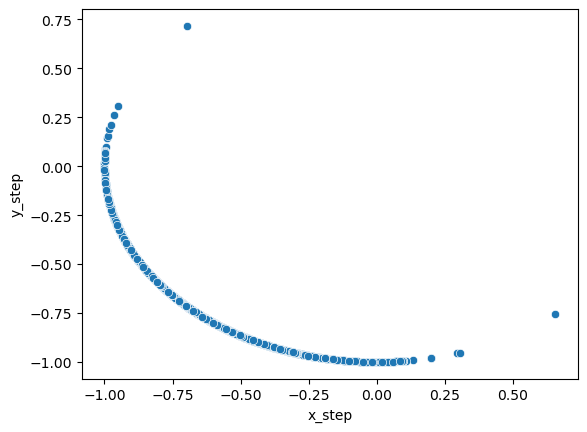

In [83]:
harm_df = pd.DataFrame(harm_cossim, columns = ['x_step', 'y_step'])
sns.scatterplot(harm_df, x = 'x_step', y = 'y_step')
#more diverse goals here--refer to above and other sim

In [84]:
#TRAIN

a_trainrange = help_cossim[1:100]

X = a_trainrange
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(X)
 
df.shape


kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

label = kmeans.fit_predict(df)
 
print(label)

[0 2 0 0 2 1 1 2 2 2 2 0 1 0 0 2 0 0 2 1 2 2 0 2 0 0 0 0 0 0 2 2 2 2 1 0 1
 2 2 2 2 2 1 2 0 1 0 0 2 0 0 0 0 0 0 0 0 2 2 2 1 2 2 2 2 0 1 2 0 0 2 2 0 0
 2 0 2 2 2 2 2 2 2 0 2 1 1 0 2 2 2 0 0 2 2 2 2 2 2]


In [85]:
#TRAIN

b_trainrange = harm_cossim[1:100]

X = b_trainrange
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(X)
 
df.shape


kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

label = kmeans.fit_predict(df)
 
print(label)

[0 1 2 0 0 0 2 2 2 0 1 2 0 2 2 2 2 2 2 2 0 1 2 2 2 0 0 0 0 0 1 2 2 0 1 0 2
 2 2 2 0 0 2 1 0 2 2 0 1 0 2 0 2 0 2 0 2 2 0 2 2 1 2 0 2 0 1 1 2 1 1 2 2 2
 0 0 2 0 0 2 2 0 2 2 0 1 1 1 0 0 2 2 2 2 2 1 2 2 1]


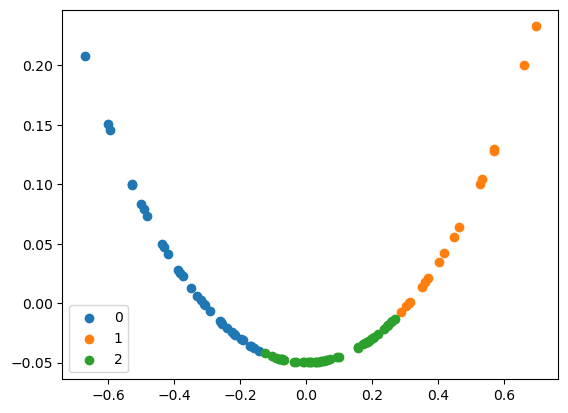

In [86]:
#PLOT TRAIN

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [87]:
#TEST--need pred

Y = np.array(helped[101:400])
pca = PCA(2)
 
#Transform the data
dftest = pca.fit_transform(Y)
 
dftest.shape


kmeanstest = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(dftest)

labeltest = kmeanstest.fit_predict(dftest)
 
print(labeltest)

[0 1 2 0 1 1 0 2 1 1 0 0 2 0 2 1 2 0 2 2 1 2 2 0 2 0 0 2 1 2 2 0 0 0 2 1 0
 2 2 1 2 2 1 1 0 0 0 2 2 2 0 0 1 2 1 0 0 0 1 1 2 1 0 0 2 2 0 1 1 1 1 1 2 1
 1 2 2 1 2 0 0 2 1 1 2 1 2 1 1 0 1 2 2 2 2 0 0 1 2 0 0 1 1 1 1 1 2 0 0 1 1
 0 2 0 2 1 0 1 2 1 1 1 1 2 2 1 2 1 1 0 2 2 0 0 2 0 2 0 0 2 1 1 1 0 2 0 0 0
 0 2 0 1 1 2 1 0 0 2 0 1 2 0 2 2 2 0 1 1 1 1 1 1 0 2 1 0 0 1 1 0 2 0 1 2 2
 0 1 1 1 2 1 2 2 0 1 2 1 2 2 0 2 1 0 0 1 0 1 2 2 0 2 0 1 1 1 2 0 0 0 2 2 1
 2 0 2 1 1 1 1 0 1 0 2 1 1 0 1 0 2 0 2 1 1 1 2 1 0 1 2 2 1 1 0 0 2 1 0 2 2
 0 0 0 2 0 0 2 1 2 2 0 0 1 1 1 1 2 2 2 0 2 1 1 2 2 1 1 1 2 0 0 1 2 0 1 2 1
 0 2 1]


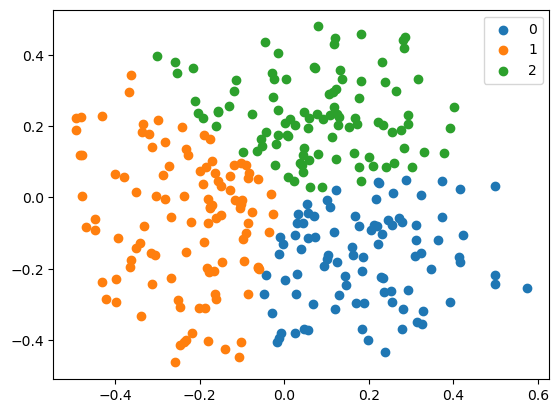

In [88]:
#PLOT TEST

#Getting unique labels
 
u_labelstest = np.unique(labeltest)
 
#plotting the results:
 
for i in u_labelstest:
    plt.scatter(dftest[labeltest == i , 0] , dftest[labeltest == i , 1] , label = i)
plt.legend()
plt.show()

#3 goals among type(s) of agent

In [89]:
#introduce noise from Helper, Hinderer
clean_signal = pd.DataFrame(df, columns = ('x_step', 'y_step'), dtype=float)

result = map(lambda x, y: abs(x + y), a_trainrange, b_trainrange)
d = list(result)
mu, sigma = 0, d

noise = np.random.normal(mu, sigma, [99, 2])
signal = clean_signal + noise

signal_array = np.array(signal)
signal_df = pd.DataFrame(signal_array, columns = ('x_step', 'y_step'), dtype=float)
signal_df

,x_step,y_step
0,0.134826,0.709109
1,0.052831,0.115384
2,0.955627,2.393813
3,-1.040909,0.003677
4,-0.772241,2.052809
...,...,...
94,-1.136471,2.239466
95,-0.329600,1.066290
96,-1.281385,-1.228867
97,-1.212296,-0.308957


In [90]:
#I need difference between clean and helped/harmed to train my model
effects_df = pd.DataFrame(signal_array, columns = ('x_step_w_effect', 'y_step_w_effect'), dtype = float)
effects_df
#column helped, columns effect of help/harm on x_step:y_step
#compare clean_signal, with x_step:y_step
df1 = pd.concat([clean_signal, effects_df], axis = 1)
df1

,x_step,y_step,x_step_w_effect,y_step_w_effect
0,-0.481340,0.073527,0.134826,0.709109
1,0.403260,0.035037,0.052831,0.115384
2,0.094611,-0.045413,0.955627,2.393813
3,-0.594482,0.145941,-1.040909,0.003677
4,-0.318940,0.002299,-0.772241,2.052809
...,...,...,...,...
94,0.030225,-0.049446,-1.136471,2.239466
95,0.569738,0.128312,-0.329600,1.066290
96,0.184345,-0.032755,-1.281385,-1.228867
97,0.180496,-0.033469,-1.212296,-0.308957


<Axes: >

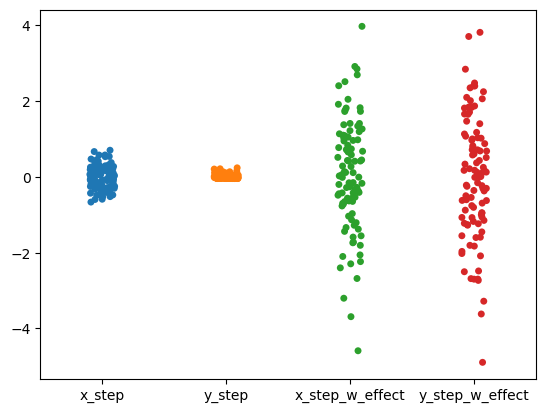

In [91]:
sns.stripplot(data=df1)

#distribution goes wider; this means there is indeed noise

In [92]:
#Game of Life vis here as well

In [93]:
#then, allocate resources according to effects, compared to starting point--requires understanding rules for denoising
#allocate not to bottom of distribution, but cluster and recluster in terms of movement trends
#the LLM will state the allocation when prompted about a row number

In [94]:
#the basic algorithm for the weights
iteredx = np.where(df1['x_step_w_effect'] < 0, abs(df1['x_step'])*10, (df1['x_step_w_effect']) + abs(df1['x_step']))
print(iteredx)
## this weighting, or sigmoid, make resource allocation much more uneven (1/df1['x_step'])
##squaring the log clusters at bottom of dist.

##squaring represents outside resources--this is illegal in survival situations, and it tends to prioritize few over others

[0.61616549 0.45609062 1.05023795 5.94482478 3.18940308 3.81427335
 0.05262662 0.71485748 0.81664261 1.97779349 0.72010682 1.27341198
 4.29644688 0.91603631 2.24343225 1.37209368 1.33353227 1.14204952
 2.58396581 0.95750188 2.16535851 0.41006664 0.49472198 0.80890749
 0.84513197 2.84996329 1.68379136 1.4096027  1.57376257 0.95675906
 4.47304928 0.48063862 1.11526778 3.33772375 3.03097393 2.14064239
 0.32693488 2.05859787 0.73631988 2.35605722 3.73691699 2.99848276
 0.15167436 0.97721557 1.34042101 1.1613273  0.08009508 4.90821533
 0.97290778 2.53054878 2.49437462 3.86557533 1.55563092 2.39852903
 0.53837695 3.2886774  0.65706746 1.78917166 2.90457213 0.65977192
 0.28620545 2.87171172 1.97885749 4.35257918 0.88917526 1.79972244
 0.9811148  1.39068952 1.14757635 1.37521418 1.50242059 0.88454227
 0.12606559 0.08297875 2.34349202 3.06540773 1.46759021 0.57654578
 4.17345272 0.12385174 2.05719975 4.1544134  1.57809744 1.48350473
 2.58247145 3.26648423 2.25472156 1.58459114 5.27644809 3.4798

<Axes: >

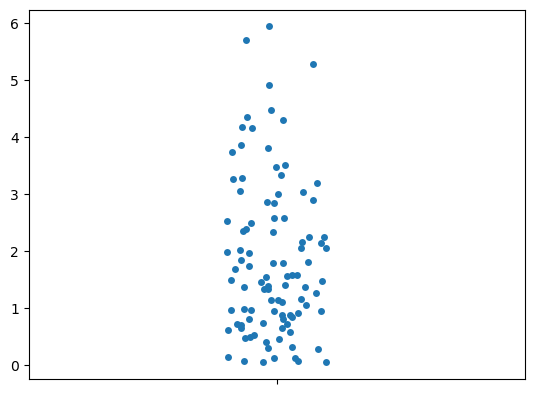

In [95]:
sns.stripplot(data=iteredx)

In [96]:
#the basic algorithm for the weights
iteredy = np.where(df1['y_step_w_effect'] < 0, abs(df1['y_step'])*10, (df1['y_step_w_effect']) + abs(df1['y_step']))
print(iteredy)

[7.82636193e-01 1.50421036e-01 2.43922669e+00 1.49617659e-01
 2.05510807e+00 1.02075332e+00 1.17488346e+00 1.69985355e+00
 4.65698384e-01 3.01639427e-01 3.24909968e-03 1.32530297e-01
 4.70675906e-01 4.57061148e-01 8.06339299e-01 2.03881706e-01
 4.70154733e-01 2.87778577e+00 1.41160753e+00 3.14575896e-01
 2.61932870e-01 2.55310373e-02 2.05174937e+00 2.42634074e+00
 1.30664260e-01 1.86247655e+00 4.61921687e-01 8.54524198e-01
 3.74534613e-01 7.02026559e-01 5.57446549e-01 4.87461374e-01
 9.05113845e-01 3.28802805e-01 2.68732160e-01 2.67380404e-01
 1.01050611e+00 1.82586952e-01 4.71857581e-01 2.17385409e-01
 2.25171736e-01 1.50805521e+00 4.14361221e-01 3.92820614e+00
 1.51829074e-01 3.78732968e-01 4.98722848e-01 7.88000536e-01
 6.44427347e-01 1.73730135e-01 1.86360729e+00 1.89127909e+00
 1.99027962e-01 2.07294301e-01 4.84512126e-01 5.69754510e-02
 1.94174944e-01 3.85373258e+00 7.13893552e-01 6.22913919e-01
 7.24558857e-01 1.28535289e-01 1.04447936e+00 4.97593391e-01
 4.81118514e-01 2.075281

<Axes: >

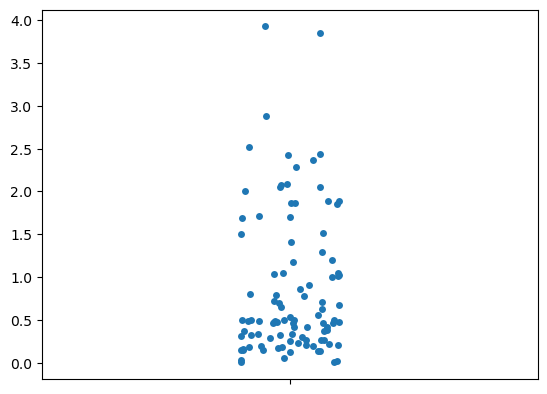

In [97]:
sns.stripplot(data=iteredy)

In [98]:
#the more weighted from the noise, the more "layered" and uneven the results--implies current circumstances alone aren't adequate for optimal compassionate resource allocation
# some better off, some a lot worse off, but leaves stragglers, from weights as either start-state OR noise
#entropy and some irreversibility

In [99]:
#if the main term can only be the resource allocations, start and/or end--cannot be simple addition of these, because they have to advance, not just return to start state

In [100]:
negot_x = max(iteredx) - max(iteredy)

In [110]:
logcurvex = iteredx + math.log2(negot_x)
logcurvex

array([1.62810377, 1.4680289 , 2.06217623, 6.95676305, 4.20134136,
       4.82621163, 1.06456489, 1.72679576, 1.82858089, 2.98973177,
       1.7320451 , 2.28535026, 5.30838516, 1.92797459, 3.25537053,
       2.38403196, 2.34547055, 2.1539878 , 3.59590408, 1.96944016,
       3.17729679, 1.42200492, 1.50666026, 1.82084577, 1.85707024,
       3.86190156, 2.69572964, 2.42154098, 2.58570085, 1.96869733,
       5.48498755, 1.4925769 , 2.12720606, 4.34966203, 4.0429122 ,
       3.15258067, 1.33887316, 3.07053614, 1.74825816, 3.36799549,
       4.74885527, 4.01042104, 1.16361263, 1.98915385, 2.35235928,
       2.17326558, 1.09203335, 5.92015361, 1.98484606, 3.54248706,
       3.50631289, 4.87751361, 2.5675692 , 3.41046731, 1.55031523,
       4.30061567, 1.66900573, 2.80110994, 3.91651041, 1.6717102 ,
       1.29814372, 3.88365   , 2.99079576, 5.36451746, 1.90111353,
       2.81166071, 1.99305307, 2.40262779, 2.15951463, 2.38715246,
       2.51435887, 1.89648055, 1.13800387, 1.09491702, 3.35543

In [127]:
logcurvey = iteredy + math.log2(negot_x)
logcurvey

array([1.79457447, 1.16235931, 3.45116496, 1.16155594, 3.06704635,
       2.0326916 , 2.18682174, 2.71179183, 1.47763666, 1.3135777 ,
       1.01518738, 1.14446857, 1.48261418, 1.46899942, 1.81827758,
       1.21581998, 1.48209301, 3.88972405, 2.42354581, 1.32651417,
       1.27387115, 1.03746931, 3.06368765, 3.43827902, 1.14260254,
       2.87441483, 1.47385996, 1.86646247, 1.38647289, 1.71396484,
       1.56938483, 1.49939965, 1.91705212, 1.34074108, 1.28067044,
       1.27931868, 2.02244439, 1.19452523, 1.48379586, 1.22932369,
       1.23711001, 2.51999349, 1.4262995 , 4.94014442, 1.16376735,
       1.39067124, 1.51066112, 1.79993881, 1.65636562, 1.18566841,
       2.87554557, 2.90321737, 1.21096624, 1.21923258, 1.4964504 ,
       1.06891373, 1.20611322, 4.86567086, 1.72583183, 1.6348522 ,
       1.73649713, 1.14047357, 2.05641764, 1.50953167, 1.49305679,
       3.08721958, 2.30929271, 1.43081581, 2.70406252, 3.0173849 ,
       1.0237367 , 1.3400189 , 1.5097536 , 1.51064773, 1.68315

<Axes: >

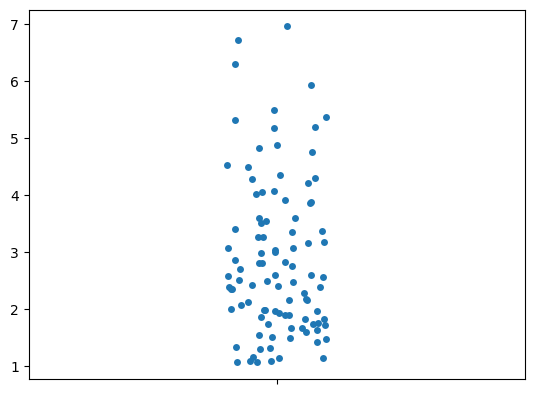

In [108]:
sns.stripplot(logcurvex)

In [101]:
#negotiate between the best-off and worst-off--exchange while moving forward, to take advantage of irreversibility of the noise
iteredx_negotiate = np.where(iteredx < max(iteredx), max(iteredx), iteredx + math.log2(negot_x))
print(iteredx_negotiate)

[5.94482478 5.94482478 5.94482478 6.95676305 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478
 5.94482478 5.94482478 5.94482478 5.94482478 5.94482478 5.9448

In [102]:
#negotiate between the best-off and worst-off
iteredy_negotiate = np.where(iteredy < max(iteredy), max(iteredy), iteredy + math.log2(negot_x))
print(iteredy_negotiate)

[3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 4.94014442 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614
 3.92820614 3.92820614 3.92820614 3.92820614 3.92820614 3.9282

In [132]:
#in reality, altruists give up something to help others; we have only what each data point has to get to be max
#hyperparameters
speed_help = 0
y_weight = 0.75
x_weight = 0.85

while (speed_help < 11):
    speed_help = speed_help + 1
    optx = np.where(logcurvex > (logcurvex/speed_help), iteredx_negotiate - (logcurvex/speed_help), iteredx + logcurvex/speed_help)
    print(optx)

while (speed_help < 11):
    speed_help = speed_help + 1
    opty = np.where(logcurvey > (logcurvey/speed_help), iteredy_negotiate - (logcurvey/speed_help), iteredy + logcurvey/speed_help)
    print(opty)

[ 2.24426926  1.92411952  3.11241418 12.90158783  7.39074444  8.64048497
  1.11719151  2.44165324  2.6452235   4.96752526  2.45215192  3.55876223
  9.60483204  2.84401089  5.49880278  3.75612565  3.67900281  3.29603732
  6.17986989  2.92694204  5.3426553   1.83207155  2.00138224  2.62975326
  2.70220221  6.71186485  4.379521    3.83114368  4.15946342  2.92545639
  9.95803683  1.97321552  3.24247384  7.68738578  7.07388613  5.29322306
  1.66580804  5.12913401  2.48457803  5.72405271  8.48577226  7.0089038
  1.31528699  2.96636942  3.69278029  3.33459288  1.17212843 10.82836894
  2.95775384  6.07303584  6.00068751  8.74308894  4.12320012  5.80899634
  2.08869218  7.58929307  2.32607319  4.5902816   6.82108253  2.33148212
  1.58434917  6.75536172  4.96965325  9.71709664  2.79028879  4.61138315
  2.97416787  3.79331731  3.30709098  3.76236664  4.01677946  2.78102282
  1.26406946  1.17789577  5.69892232  7.14275374  3.94711869  2.16502983
  9.35884372  1.25964175  5.12633777  9.32076507  4.

In [130]:
#how to exchange and value one resource over another?
#having more or less makes more or less valuable?
#add personalized weights!!!--as hyperparameter, human in the loop